# $Netflix Movies and TV Shows$

### $I. Data Description$

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('netflix_titles.csv')

In [73]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [74]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [75]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [76]:
df.shape

(8807, 12)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [78]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### $II. Data Cleaning Methods$

#### 1. Modify columns Names

In [79]:
df.replace('', np.nan, inplace=True)

In [80]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [81]:
df=df.drop(columns=['description'])

#### 2. Missing values

In [82]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [1]:
# Calculate null values as a percentage
null_percentage = (df.isnull().sum() / len(df)) * 100

print(null_percentage)

NameError: name 'df' is not defined

## Fill Missing Values

In [83]:
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)
df = df.dropna(subset=['date_added', 'rating', 'duration'])

In [84]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

#### 3. Duplicated Values

In [85]:
df.duplicated().sum()

np.int64(0)

#### 4. outliers

In [86]:
Q1_year = df['release_year'].quantile(0.25)
Q3_year = df['release_year'].quantile(0.75)
IQR_year = Q3_year - Q1_year

lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

print("RELEASE YEAR OUTLIER ANALYSIS:")
print(f"Q1 (25th percentile): {Q1_year}")
print(f"Q3 (75th percentile): {Q3_year}")
print(f"IQR: {IQR_year}")
print(f"Lower bound: {lower_bound_year}")
print(f"Upper bound: {upper_bound_year}")

year_outliers = df[(df['release_year'] < lower_bound_year) | (df['release_year'] > upper_bound_year)]
print(f"\nNumber of release_year outliers: {len(year_outliers)}")
print(f"Percentage of data: {(len(year_outliers)/len(df))*100:.2f}%")

if len(year_outliers) > 0:
    print("\nSample of release_year outliers:")
    print(year_outliers[['title', 'release_year', 'type']].head(5))


RELEASE YEAR OUTLIER ANALYSIS:
Q1 (25th percentile): 2013.0
Q3 (75th percentile): 2019.0
IQR: 6.0
Lower bound: 2004.0
Upper bound: 2028.0

Number of release_year outliers: 717
Percentage of data: 8.16%

Sample of release_year outliers:
              title  release_year   type
7           Sankofa          1993  Movie
22  Avvai Shanmughi          1996  Movie
24            Jeans          1998  Movie
26   Minsara Kanavu          1997  Movie
41             Jaws          1975  Movie


In [87]:
old_movies = df[df['release_year'] < 1994]  # Assuming outliers are very old
print(f"Number of movies released before 1950: {len(old_movies)}")
print("\nOldest movies in the dataset:")
print(old_movies[['title', 'release_year']].sort_values('release_year').head(10))


Number of movies released before 1950: 341

Oldest movies in the dataset:
                                                 title  release_year
4250                 Pioneers: First Women Filmmakers*          1925
8205                              The Battle of Midway          1942
7790                                    Prelude to War          1942
8739                Why We Fight: The Battle of Russia          1943
8763                   WWII: Report from the Aleutians          1943
8660     Undercover: How to Operate Behind Enemy Lines          1943
8436                                 The Negro Soldier          1944
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944
8640                                  Tunisian Victory          1944
7930                                        San Pietro          1945


In [88]:
df = df[(df['release_year'] >= lower_bound_year) & (df['release_year'] <= upper_bound_year)]

In [89]:
df.shape

(8073, 11)

In [90]:
## convert to CSV
df.to_csv('netflix_titles_cleaned.csv', index=False)

### $III. Counts Category$

#### Director 

In [91]:
counts=df['director'].value_counts().head(15)
print(counts)


director
unknown                   2546
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Don Michael Paul            10
Hakan Algül                  8
Ryan Polito                  8
Kunle Afolayan               8
Fernando Ayllón              8
Lance Bangs                  8
Shannon Hartman              8
Name: count, dtype: int64


In [92]:
df['cast_name']=df['cast'].str.split(',')
df_exploded=df.explode('cast_name')
cast_counts=df_exploded['cast_name'].value_counts()
cast_counts_df=cast_counts.reset_index()
cast_counts_df.columns=['cast_name','count']
print(cast_counts_df)

                  cast_name  count
0                   unknown    806
1              Rupa Bhimani     31
2          Takahiro Sakurai     30
3             Julie Tejwani     28
4               Anupam Kher     27
...                     ...    ...
36231     Christopher Smith      1
36232          Anil Rastogi      1
36233         Vinod Acharya      1
36234   Siddharth Chandekar      1
36235     Noureddine Farihi      1

[36236 rows x 2 columns]


In [93]:
type_count = df['type'].value_counts()
print(type_count)


type
Movie      5482
TV Show    2591
Name: count, dtype: int64


In [94]:
type_percent = df['type'].value_counts(normalize=True) * 100
print(type_percent)

type
Movie      67.905364
TV Show    32.094636
Name: proportion, dtype: float64


In [95]:
country_counts = df['country'].value_counts().head(15)
print(country_counts)

country
United States     3288
India              855
United Kingdom     396
Japan              225
South Korea        199
Canada             179
Spain              145
France             122
Mexico             105
Turkey             103
Egypt               95
Nigeria             94
Australia           81
Taiwan              78
Brazil              77
Name: count, dtype: int64


In [96]:
country_percent = df['country'].value_counts(normalize=True) * 100
print(country_percent.head(10))

country
United States     40.728354
India             10.590858
United Kingdom     4.905240
Japan              2.787068
South Korea        2.465007
Canada             2.217267
Spain              1.796110
France             1.511210
Mexico             1.300632
Turkey             1.275858
Name: proportion, dtype: float64


In [97]:
rating_counts = df['rating'].value_counts()
print(rating_counts)

rating_percent = df['rating'].value_counts(normalize=True) * 100
print(rating_percent.head)

rating
TV-MA       3123
TV-14       1984
TV-PG        796
R            638
PG-13        379
TV-Y7        317
TV-Y         303
PG           222
TV-G         207
NR            72
G             21
TV-Y7-FV       6
NC-17          3
UR             2
Name: count, dtype: int64
<bound method NDFrame.head of rating
TV-MA       38.684504
TV-14       24.575746
TV-PG        9.860027
R            7.902886
PG-13        4.694661
TV-Y7        3.926669
TV-Y         3.753252
PG           2.749907
TV-G         2.564103
NR           0.891862
G            0.260126
TV-Y7-FV     0.074322
NC-17        0.037161
UR           0.024774
Name: proportion, dtype: float64>


In [98]:
counts=df['release_year'].value_counts().head(20)
print(counts)

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
2007      88
2005      80
2004      64
Name: count, dtype: int64


In [99]:
type_by_year = (
    df.groupby(['release_year', 'type'])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

print(type_by_year)

type          Movie  TV Show
release_year                
2004             55        9
2005             67       13
2006             82       14
2007             74       14
2008            113       22
2009            118       34
2010            153       39
2011            145       40
2012            173       63
2013            225       61
2014            264       88
2015            396      159
2016            658      243
2017            765      265
2018            767      379
2019            633      397
2020            517      436
2021            277      315


In [100]:
genres = df['listed_in'].str.split(', ').explode()
top_10_genres = genres.value_counts().head(10)
print(top_10_genres)


listed_in
International Movies        2531
Dramas                      2146
Comedies                    1453
International TV Shows      1332
Documentaries                838
TV Dramas                    753
Independent Movies           712
Action & Adventure           671
Children & Family Movies     585
TV Comedies                  556
Name: count, dtype: int64


# $IV. Data Visaulization and Insights$

#### 1. Content Type Distribution

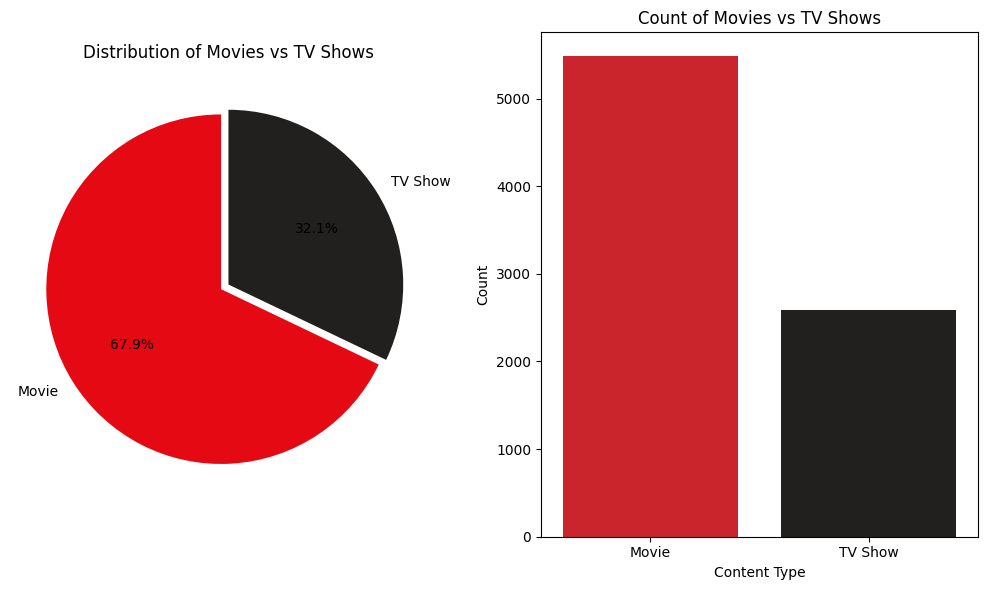

In [101]:
plt.figure(figsize=(10, 6))
type_counts = df['type'].value_counts()
colors = ['#E50914', '#221F1F']  # Netflix red and black

plt.subplot(1, 2, 1)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=(0.05, 0))
plt.title('Distribution of Movies vs TV Shows')

plt.subplot(1, 2, 2)
sns.barplot(x=type_counts.index, y=type_counts.values, palette=colors)
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### 2. Top 10 Countries by Content

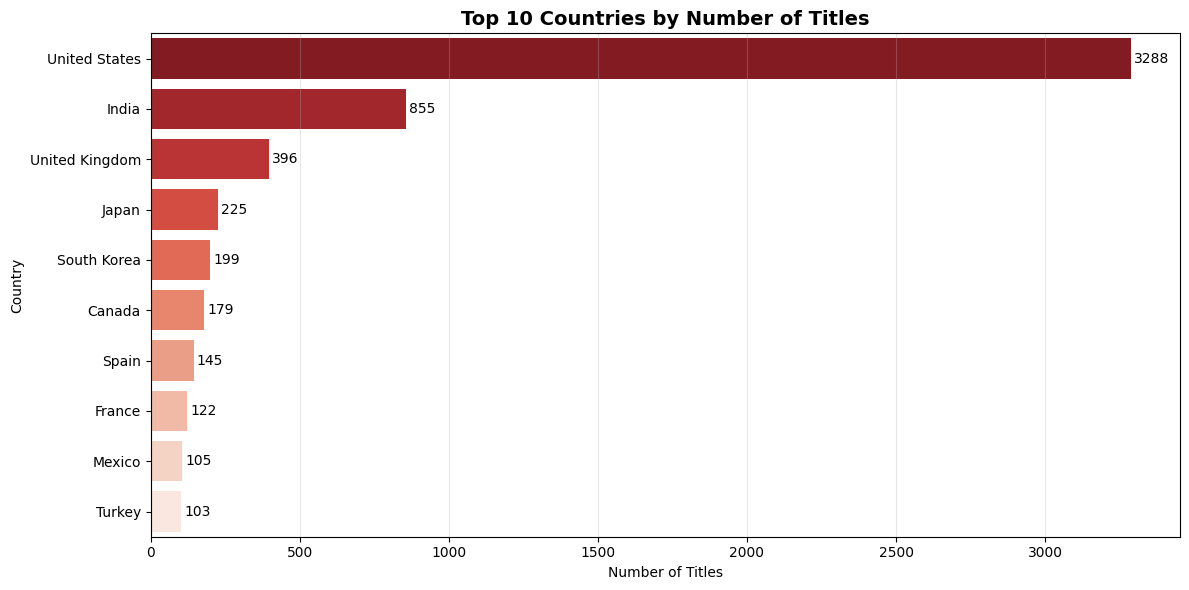

Top 5 Countries:
1. United States: 3288 titles
2. India: 855 titles
3. United Kingdom: 396 titles
4. Japan: 225 titles
5. South Korea: 199 titles


In [102]:
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')
plt.title('Top 10 Countries by Number of Titles', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(top_countries.values):
    plt.text(v + 10, i, str(v), va='center')

plt.tight_layout()
plt.show()

print("Top 5 Countries:")
for i, (country, count) in enumerate(top_countries.head(5).items(), 1):
    print(f"{i}. {country}: {count} titles")

#### 3. Rating Distribution

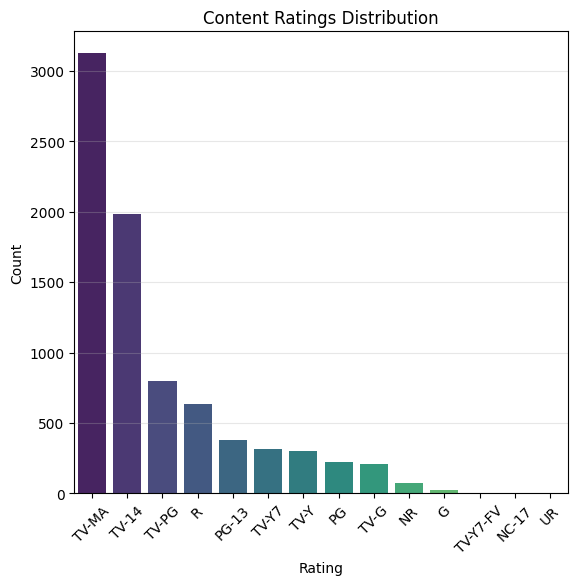

In [103]:
plt.figure(figsize=(14, 6))
rating_counts = df['rating'].value_counts()

plt.subplot(1, 2, 1)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Content Ratings Distribution', fontsize=12)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)



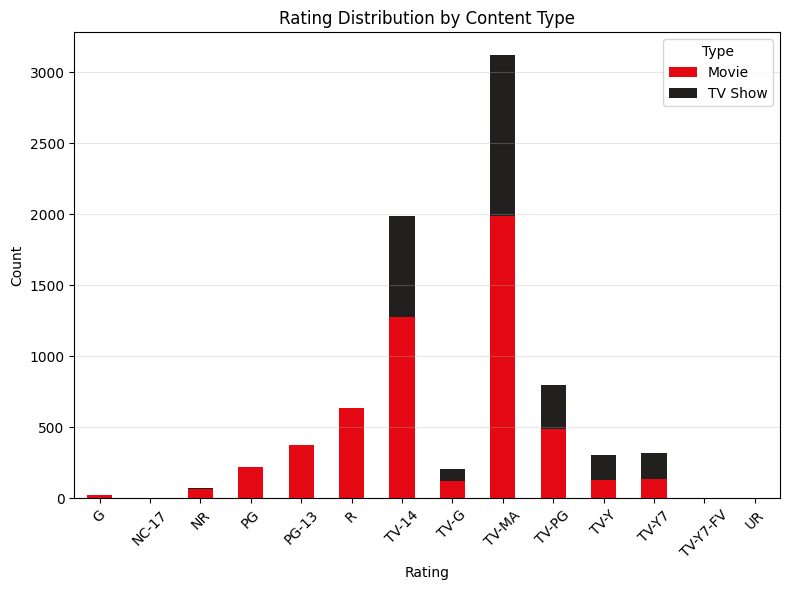

In [104]:
rating_by_type = pd.crosstab(df['rating'], df['type'])
rating_by_type.plot(kind='bar', stacked=True, figsize=(8, 6), 
                    color=['#E50914', '#221F1F'])
plt.title('Rating Distribution by Content Type', fontsize=12)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### 4. Release Year Trends

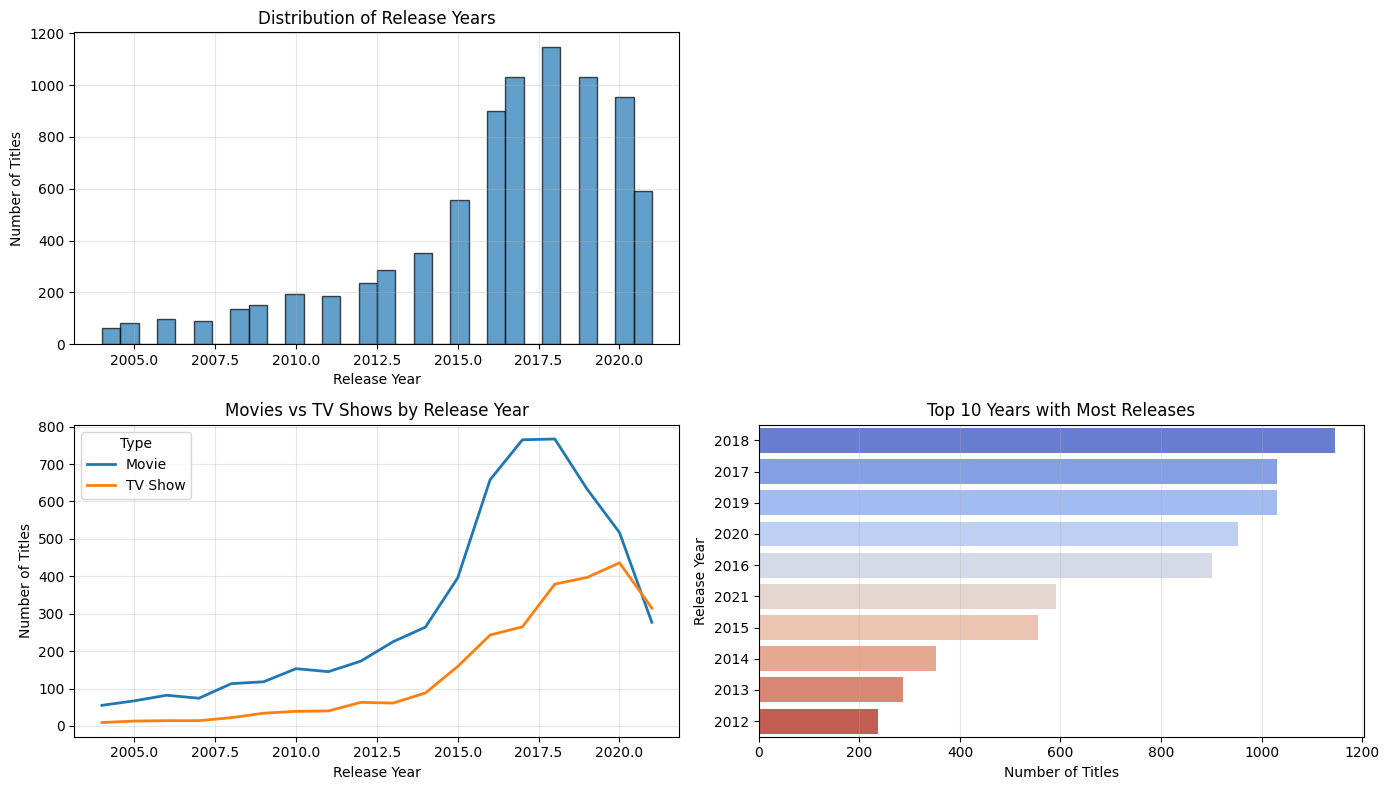

In [105]:
plt.figure(figsize=(14, 8))

# Plot 1: Release year distribution
plt.subplot(2, 2, 1)
df['release_year'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Release Years', fontsize=12)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(alpha=0.3)


# Plot 2: Movies vs TV Shows over years
plt.subplot(2, 2, 3)
type_by_year = df.groupby(['release_year', 'type']).size().unstack()
type_by_year[['Movie', 'TV Show']].plot(ax=plt.gca(), linewidth=2)
plt.title('Movies vs TV Shows by Release Year', fontsize=12)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(alpha=0.3)
plt.legend(title='Type')

# Plot 3: Top 10 years with most releases
plt.subplot(2, 2, 4)
top_years = df['release_year'].value_counts().head(10)
sns.barplot(x=top_years.values, y=top_years.index.astype(str), palette='coolwarm')
plt.title('Top 10 Years with Most Releases', fontsize=12)
plt.xlabel('Number of Titles')
plt.ylabel('Release Year')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


 #### 5. Duration Analysis

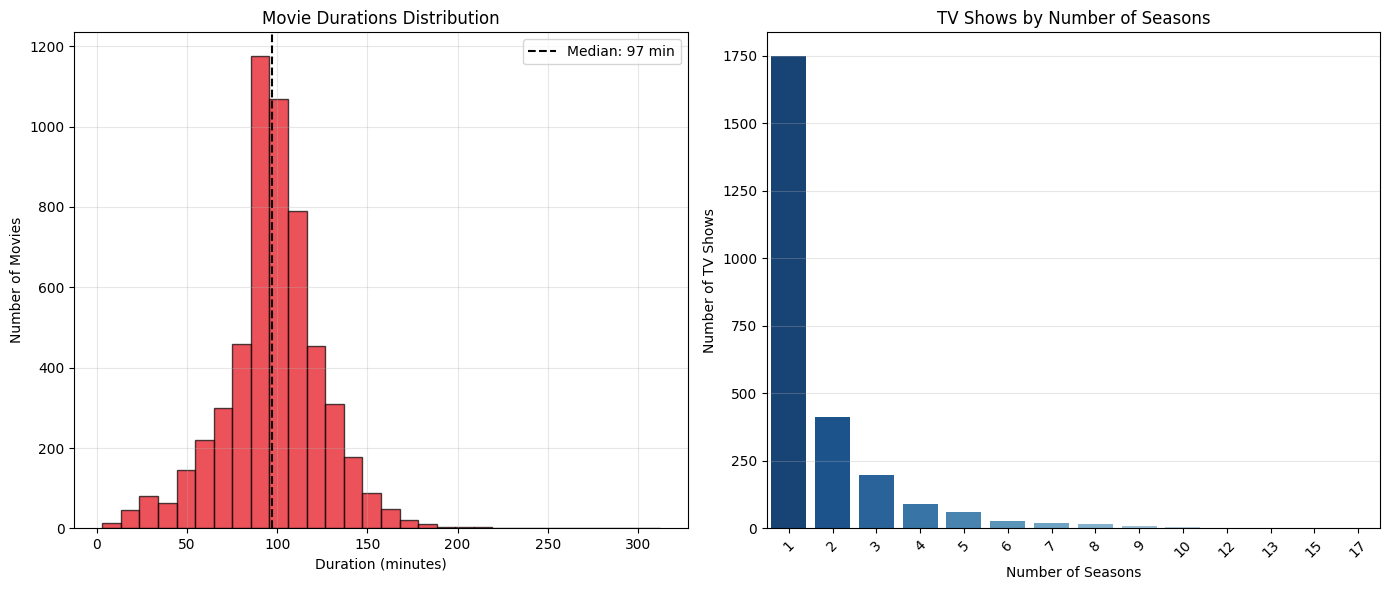

In [106]:
plt.figure(figsize=(14, 6))

# Convert duration to numeric for movies
movies = df[df['type'] == 'Movie'].copy()
movies['duration_numeric'] = movies['duration'].str.extract(r'(\d+)').astype(int)

# Plot 1: Movie durations
plt.subplot(1, 2, 1)
plt.hist(movies['duration_numeric'], bins=30, edgecolor='black', alpha=0.7, color='#E50914')
plt.title('Movie Durations Distribution', fontsize=12)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(alpha=0.3)
plt.axvline(movies['duration_numeric'].median(), color='black', linestyle='--', 
            label=f"Median: {movies['duration_numeric'].median():.0f} min")
plt.legend()

# Plot 2: TV Show seasons
plt.subplot(1, 2, 2)
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['duration_numeric'] = tv_shows['duration'].str.extract(r'(\d+)').astype(int)
season_counts = tv_shows['duration_numeric'].value_counts().sort_index().head(15)
sns.barplot(x=season_counts.index.astype(str), y=season_counts.values, palette='Blues_r')
plt.title('TV Shows by Number of Seasons', fontsize=12)
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 6. Top Genres/Categories

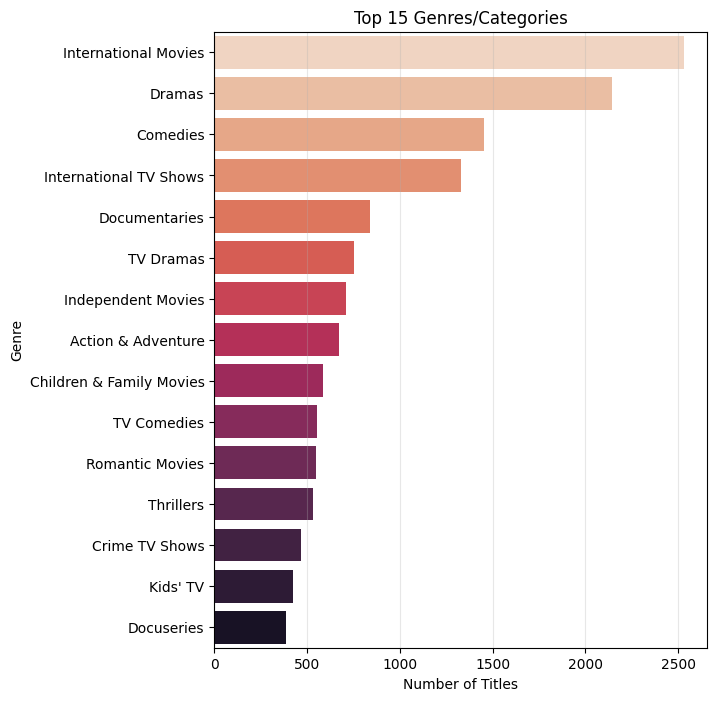

In [107]:
plt.figure(figsize=(14, 8))

# Plot 1: Top 15 genres
plt.subplot(1, 2, 1)
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(15)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket_r')
plt.title('Top 15 Genres/Categories', fontsize=12)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', alpha=0.3)



#### 7. Director Analysis (Top 10)

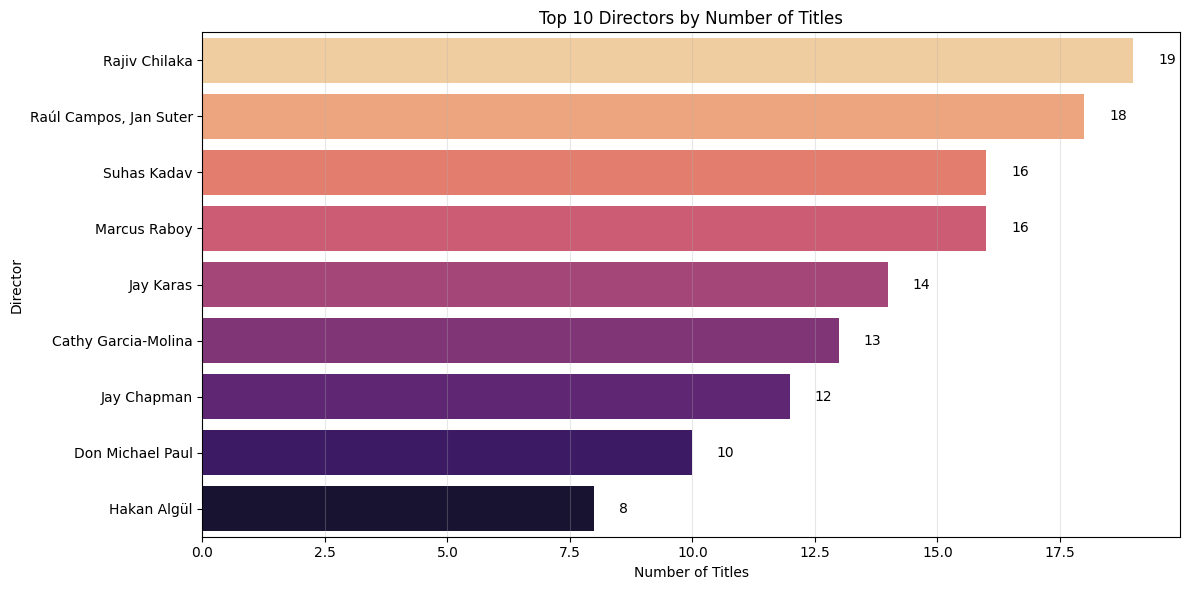

In [108]:
plt.figure(figsize=(12, 6))
top_directors = df['director'].value_counts().head(10)
top_directors = top_directors[top_directors.index != 'unknown']  # Remove 'unknown'

sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma_r')
plt.title('Top 10 Directors by Number of Titles', fontsize=12)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_directors.values):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

#### 8. Cast Analysis (Top 10 Actors)

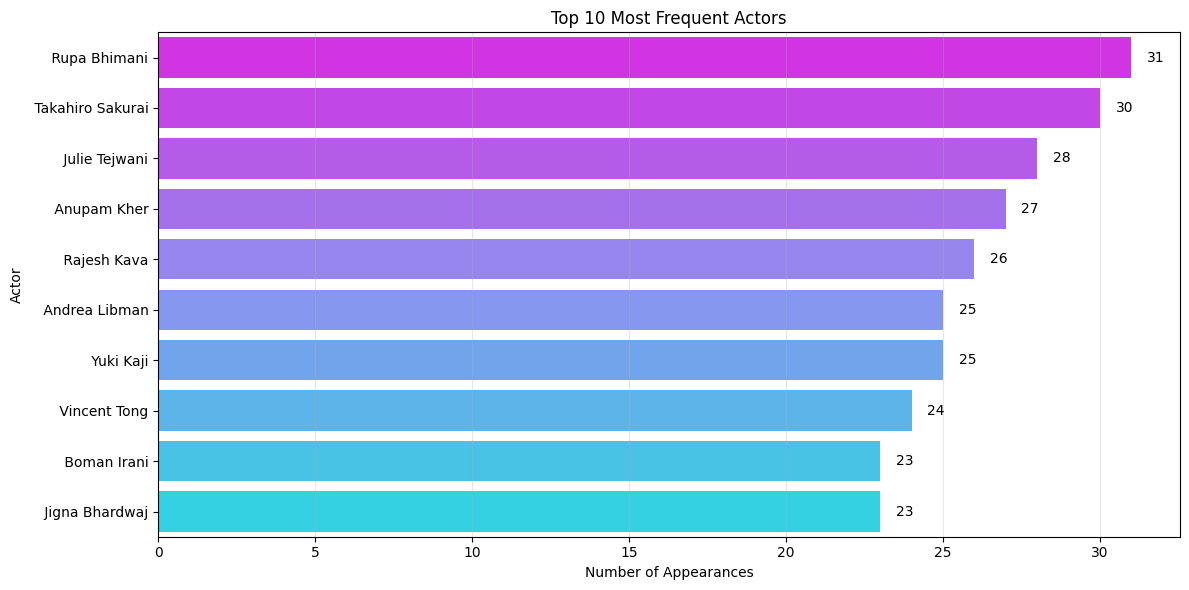

Total unique cast members: 36235


In [109]:
plt.figure(figsize=(12, 6))
cast_name = df['cast'].str.split(',').explode()
cast_name = cast_name[cast_name != 'unknown']
top_cast = cast_name.value_counts().head(10)

sns.barplot(x=top_cast.values, y=top_cast.index, palette='cool_r')
plt.title('Top 10 Most Frequent Actors', fontsize=12)
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_cast.values):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

print(f"Total unique cast members: {cast_name.nunique()}")

CORRELATION ANALYSIS FOR MOVIES
                  release_year  duration_minutes
release_year          1.000000         -0.178061
duration_minutes     -0.178061          1.000000


CORRELATION ANALYSIS FOR TV SHOWS
                  release_year  duration_seasons
release_year          1.000000          0.003692
duration_seasons      0.003692          1.000000


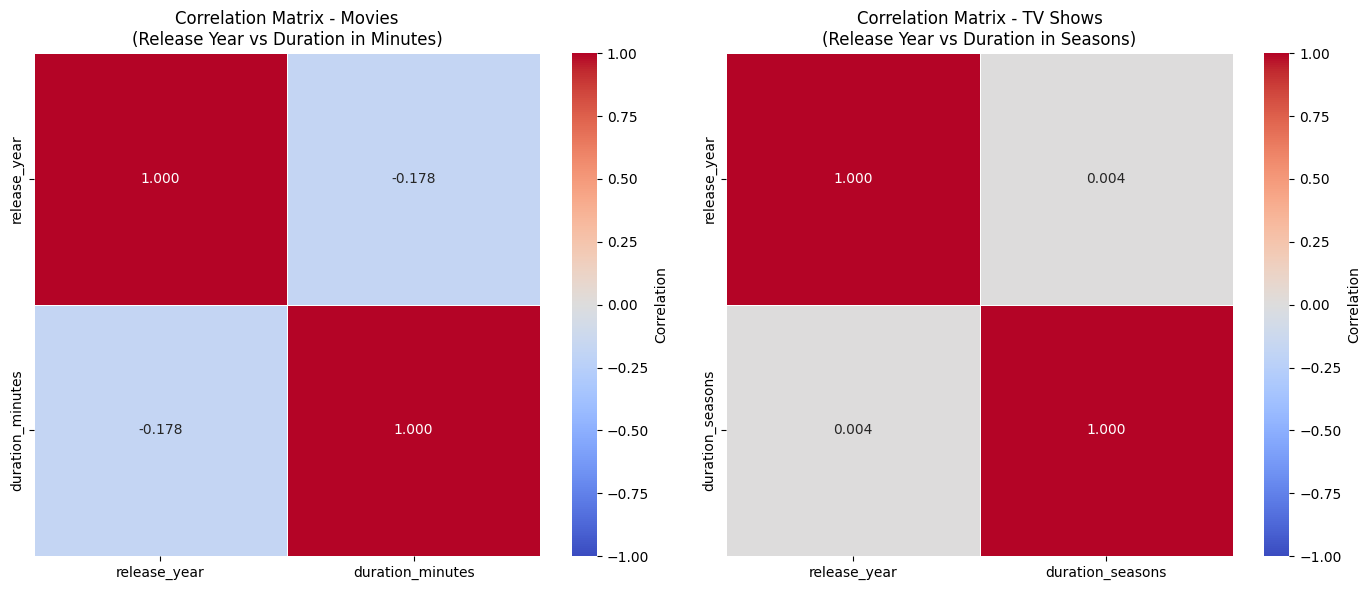

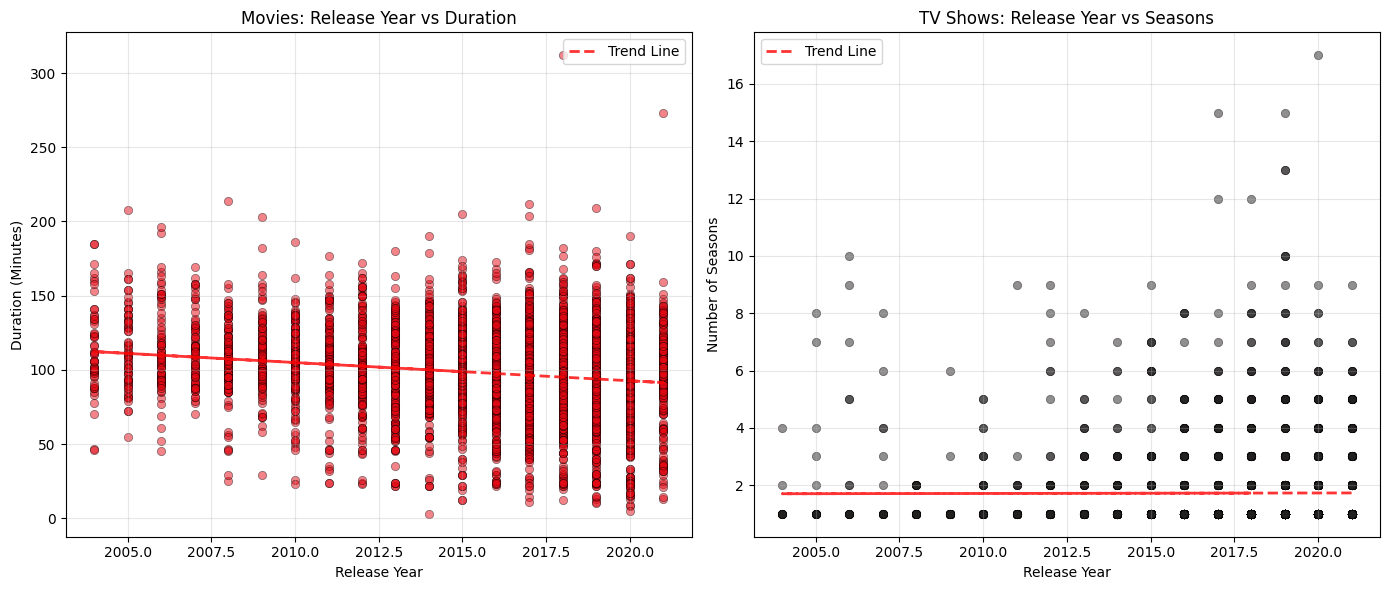



SUMMARY STATISTICS

Movies Duration (Minutes):
count    5482.000000
mean       97.748814
std        26.918621
min         3.000000
25%        86.000000
50%        97.000000
75%       112.000000
max       312.000000
Name: duration_minutes, dtype: float64

Correlation between Release Year and Duration: -0.178


TV Shows Duration (Seasons):
count    2591.000000
mean        1.721729
std         1.494438
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64

Correlation between Release Year and Duration: 0.004


In [110]:

movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration for movies (minutes)
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(int)

# Extract numeric duration for TV shows (seasons)
tv_shows_df['duration_seasons'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)

# Create correlation matrix for Movies
print("CORRELATION ANALYSIS FOR MOVIES")
print("=" * 50)
movies_numeric = movies_df[['release_year', 'duration_minutes']]
movies_correlation = movies_numeric.corr()
print(movies_correlation)

plt.figure(figsize=(14, 6))

# Plot 1: Movies correlation
plt.subplot(1, 2, 1)
sns.heatmap(
    movies_correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.3f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'},
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix - Movies\n(Release Year vs Duration in Minutes)', fontsize=12)

# Plot 2: TV Shows correlation
print("\n\nCORRELATION ANALYSIS FOR TV SHOWS")
print("=" * 50)
tv_numeric = tv_shows_df[['release_year', 'duration_seasons']]
tv_correlation = tv_numeric.corr()
print(tv_correlation)

plt.subplot(1, 2, 2)
sns.heatmap(
    tv_correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.3f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'},
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix - TV Shows\n(Release Year vs Duration in Seasons)', fontsize=12)

plt.tight_layout()
plt.show()

# Additional scatter plots to visualize relationships
plt.figure(figsize=(14, 6))

# Scatter plot for Movies
plt.subplot(1, 2, 1)
plt.scatter(movies_df['release_year'], movies_df['duration_minutes'], 
            alpha=0.5, c='#E50914', edgecolors='black', linewidth=0.5)
plt.title('Movies: Release Year vs Duration', fontsize=12)
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(movies_df['release_year'], movies_df['duration_minutes'], 1)
p = np.poly1d(z)
plt.plot(movies_df['release_year'], p(movies_df['release_year']), 
         "r--", alpha=0.8, linewidth=2, label='Trend Line')
plt.legend()

# Scatter plot for TV Shows
plt.subplot(1, 2, 2)
plt.scatter(tv_shows_df['release_year'], tv_shows_df['duration_seasons'], 
            alpha=0.5, c='#221F1F', edgecolors='black', linewidth=0.5)
plt.title('TV Shows: Release Year vs Seasons', fontsize=12)
plt.xlabel('Release Year')
plt.ylabel('Number of Seasons')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(tv_shows_df['release_year'], tv_shows_df['duration_seasons'], 1)
p = np.poly1d(z)
plt.plot(tv_shows_df['release_year'], p(tv_shows_df['release_year']), 
         "r--", alpha=0.8, linewidth=2, label='Trend Line')
plt.legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n\nSUMMARY STATISTICS")
print("=" * 50)
print("\nMovies Duration (Minutes):")
print(movies_df['duration_minutes'].describe())
print(f"\nCorrelation between Release Year and Duration: {movies_correlation.iloc[0, 1]:.3f}")

print("\n\nTV Shows Duration (Seasons):")
print(tv_shows_df['duration_seasons'].describe())
print(f"\nCorrelation between Release Year and Duration: {tv_correlation.iloc[0, 1]:.3f}")

# 6. Machine Learning

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

#### 1. Feature Engineering for Movies

In [112]:
# Prepare Movies dataset
movies_ml = movies_df.copy()

# Extract year added
movies_ml['year_added'] = pd.to_datetime(movies_ml['date_added']).dt.year
movies_ml['month_added'] = pd.to_datetime(movies_ml['date_added']).dt.month

# Count number of genres
movies_ml['genre_count'] = movies_ml['listed_in'].str.split(',').str.len()

# Count number of countries
movies_ml['country_count'] = movies_ml['country'].str.split(',').str.len()

# Encode categorical variables
le_rating = LabelEncoder()
movies_ml['rating_encoded'] = le_rating.fit_transform(movies_ml['rating'])

# Extract first country
movies_ml['first_country'] = movies_ml['country'].str.split(',').str[0].str.strip()
le_country = LabelEncoder()
movies_ml['country_encoded'] = le_country.fit_transform(movies_ml['first_country'])

# Drop rows with missing values in key columns
movies_ml = movies_ml.dropna(subset=['year_added', 'month_added'])

print("Movies ML Dataset Shape:", movies_ml.shape)
print("\nFeatures Created:")
print(movies_ml[['release_year', 'year_added', 'month_added', 'genre_count', 
                 'country_count', 'rating_encoded', 'country_encoded', 'duration_minutes']].head())

Movies ML Dataset Shape: (5482, 20)

Features Created:
    release_year  year_added  month_added  genre_count  country_count  \
0           2020        2021            9            1              1   
6           2021        2021            9            1              1   
9           2021        2021            9            2              1   
12          2021        2021            9            2              2   
13          2021        2021            9            2              1   

    rating_encoded  country_encoded  duration_minutes  
0                4               72                90  
6                3               72                91  
9                4               72               104  
12               8               21               127  
13               9               72                91  


#### 2. Linear Regression for Movies

In [113]:
X_movies = movies_ml[['release_year', 'year_added', 'month_added', 
                      'genre_count', 'country_count', 'rating_encoded', 'country_encoded']]
y_movies = movies_ml['duration_minutes']


Split data

In [114]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_movies, y_movies, test_size=0.2, random_state=42
)

Scale features

In [115]:

scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

In [116]:
print(f"\nTraining set size: {X_train_m.shape[0]}")
print(f"Test set size: {X_test_m.shape[0]}")


Training set size: 4385
Test set size: 1097


Train Linear Regression

In [117]:

lr_movies = LinearRegression()
lr_movies.fit(X_train_m_scaled, y_train_m)
y_pred_m = lr_movies.predict(X_test_m_scaled)

Evaluate

In [118]:
# Evaluate
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
mae_m = mean_absolute_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)


In [119]:
print("\n" + "="*60)
print("LINEAR REGRESSION - MOVIES DURATION PREDICTION")
print("="*60)
print(f"Root Mean Squared Error (RMSE): {rmse_m:.2f} minutes")
print(f"Mean Absolute Error (MAE): {mae_m:.2f} minutes")
print(f"R² Score: {r2_m:.4f}")
print(f"Accuracy: {r2_m*100:.2f}%")

# Feature coefficients
print("\nFeature Coefficients:")
feature_coef = pd.DataFrame({
    'Feature': X_movies.columns,
    'Coefficient': lr_movies.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_coef)


LINEAR REGRESSION - MOVIES DURATION PREDICTION
Root Mean Squared Error (RMSE): 22.35 minutes
Mean Absolute Error (MAE): 16.94 minutes
R² Score: 0.2677
Accuracy: 26.77%

Feature Coefficients:
           Feature  Coefficient
3      genre_count     9.333470
5   rating_encoded    -5.854074
6  country_encoded    -3.751460
0     release_year    -3.256031
1       year_added     2.496451
2      month_added     0.612233
4    country_count    -0.450619


 #### 3. Feature Engineering for TV Shows

Prepare TV Shows dataset

In [120]:
tv_ml = tv_shows_df.copy()



In [121]:
# Extract year added
tv_ml['year_added'] = pd.to_datetime(tv_ml['date_added'].str.strip()).dt.year
tv_ml['month_added'] = pd.to_datetime(tv_ml['date_added'].str.strip()).dt.month

In [122]:
# Count number of genres
tv_ml['genre_count'] = tv_ml['listed_in'].str.split(',').str.len()

# Count number of countries
tv_ml['country_count'] = tv_ml['country'].str.split(',').str.len()

In [123]:
# Encode categorical variables
le_rating_tv = LabelEncoder()
tv_ml['rating_encoded'] = le_rating_tv.fit_transform(tv_ml['rating'])

In [124]:
# Extract first country
tv_ml['first_country'] = tv_ml['country'].str.split(',').str[0].str.strip()
le_country_tv = LabelEncoder()
tv_ml['country_encoded'] = le_country_tv.fit_transform(tv_ml['first_country'])


In [125]:
# Drop rows with missing values
tv_ml = tv_ml.dropna(subset=['year_added', 'month_added'])

print("TV Shows ML Dataset Shape:", tv_ml.shape)
print("\nFeatures Created:")
print(tv_ml[['release_year', 'year_added', 'month_added', 'genre_count', 
             'country_count', 'rating_encoded', 'country_encoded', 'duration_seasons']].head())


TV Shows ML Dataset Shape: (2591, 20)

Features Created:
   release_year  year_added  month_added  genre_count  country_count  \
1          2021        2021            9            3              1   
2          2021        2021            9            3              1   
3          2021        2021            9            2              1   
4          2021        2021            9            3              1   
5          2021        2021            9            3              1   

   rating_encoded  country_encoded  duration_seasons  
1               4               46                 2  
2               4               57                 1  
3               4               57                 1  
4               4               21                 2  
5               4               57                 1  


#### 4. Linear Regression for TV Shows

Prepare features and target for TV Shows

In [126]:

X_tv = tv_ml[['release_year', 'year_added', 'month_added', 
              'genre_count', 'country_count', 'rating_encoded', 'country_encoded']]
y_tv = tv_ml['duration_seasons']


Split data

In [127]:
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(
    X_tv, y_tv, test_size=0.2, random_state=42
)


Scale features

In [128]:

scaler_tv = StandardScaler()
X_train_tv_scaled = scaler_tv.fit_transform(X_train_tv)
X_test_tv_scaled = scaler_tv.transform(X_test_tv)

print(f"\nTraining set size: {X_train_tv.shape[0]}")
print(f"Test set size: {X_test_tv.shape[0]}")


Training set size: 2072
Test set size: 519


Train Linear Regression

In [129]:
lr_tv = LinearRegression()
lr_tv.fit(X_train_tv_scaled, y_train_tv)
y_pred_tv = lr_tv.predict(X_test_tv_scaled)

Evaluate

In [130]:

mse_tv = mean_squared_error(y_test_tv, y_pred_tv)
rmse_tv = np.sqrt(mse_tv)
mae_tv = mean_absolute_error(y_test_tv, y_pred_tv)
r2_tv = r2_score(y_test_tv, y_pred_tv)

print("\n" + "="*60)
print("LINEAR REGRESSION - TV SHOWS SEASONS PREDICTION")
print("="*60)
print(f"Root Mean Squared Error (RMSE): {rmse_tv:.2f} seasons")
print(f"Mean Absolute Error (MAE): {mae_tv:.2f} seasons")
print(f"R² Score: {r2_tv:.4f}")
print(f"Accuracy: {r2_tv*100:.2f}%")


LINEAR REGRESSION - TV SHOWS SEASONS PREDICTION
Root Mean Squared Error (RMSE): 1.26 seasons
Mean Absolute Error (MAE): 0.90 seasons
R² Score: -0.0160
Accuracy: -1.60%


Feature coefficients

In [131]:
print("\nFeature Coefficients:")
feature_coef_tv = pd.DataFrame({
    'Feature': X_tv.columns,
    'Coefficient': lr_tv.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_coef_tv)


Feature Coefficients:
           Feature  Coefficient
3      genre_count    -0.143945
1       year_added     0.115824
4    country_count     0.108747
6  country_encoded     0.105239
0     release_year    -0.079686
5   rating_encoded    -0.040708
2      month_added     0.008383


#### 6. Residual Analysis

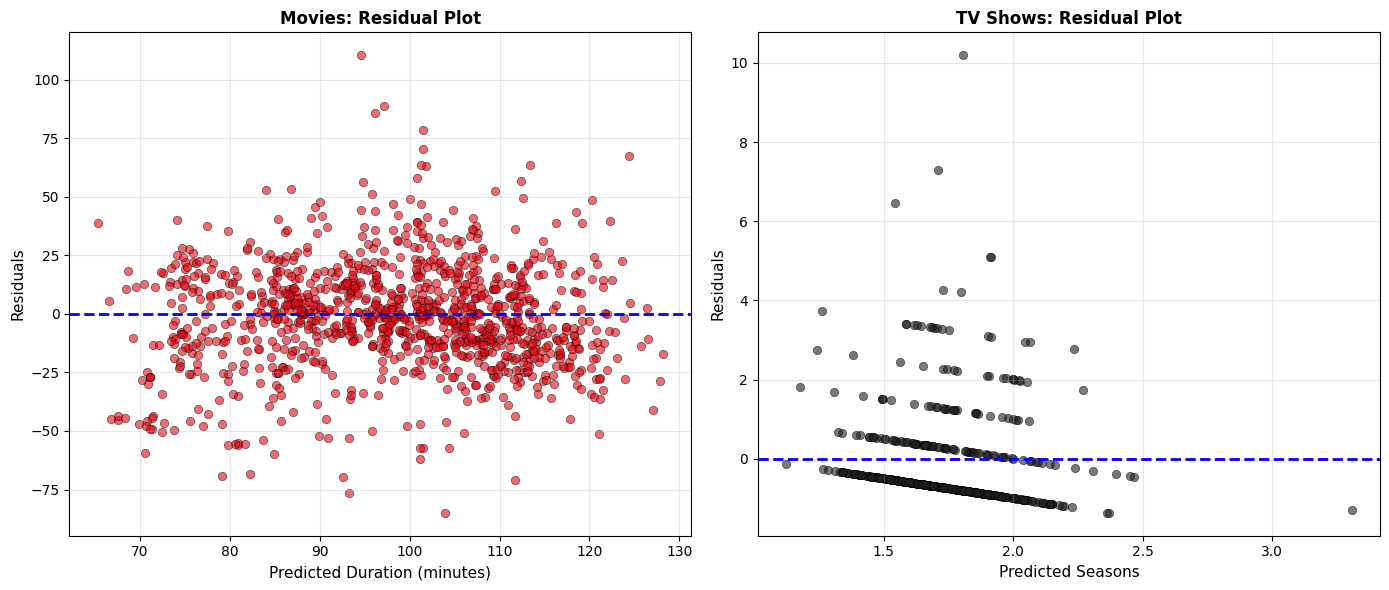

In [132]:
residuals_m = y_test_m - y_pred_m
residuals_tv = y_test_tv - y_pred_tv

plt.figure(figsize=(14, 6))

# Movies - Residual plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred_m, residuals_m, alpha=0.6, edgecolors='black', linewidth=0.5, color='#E50914')
plt.axhline(y=0, color='blue', linestyle='--', lw=2)
plt.xlabel('Predicted Duration (minutes)', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('Movies: Residual Plot', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

# TV Shows - Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred_tv, residuals_tv, alpha=0.6, edgecolors='black', linewidth=0.5, color='#221F1F')
plt.axhline(y=0, color='blue', linestyle='--', lw=2)
plt.xlabel('Predicted Seasons', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('TV Shows: Residual Plot', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

 #### 7. Feature Importance Visualization

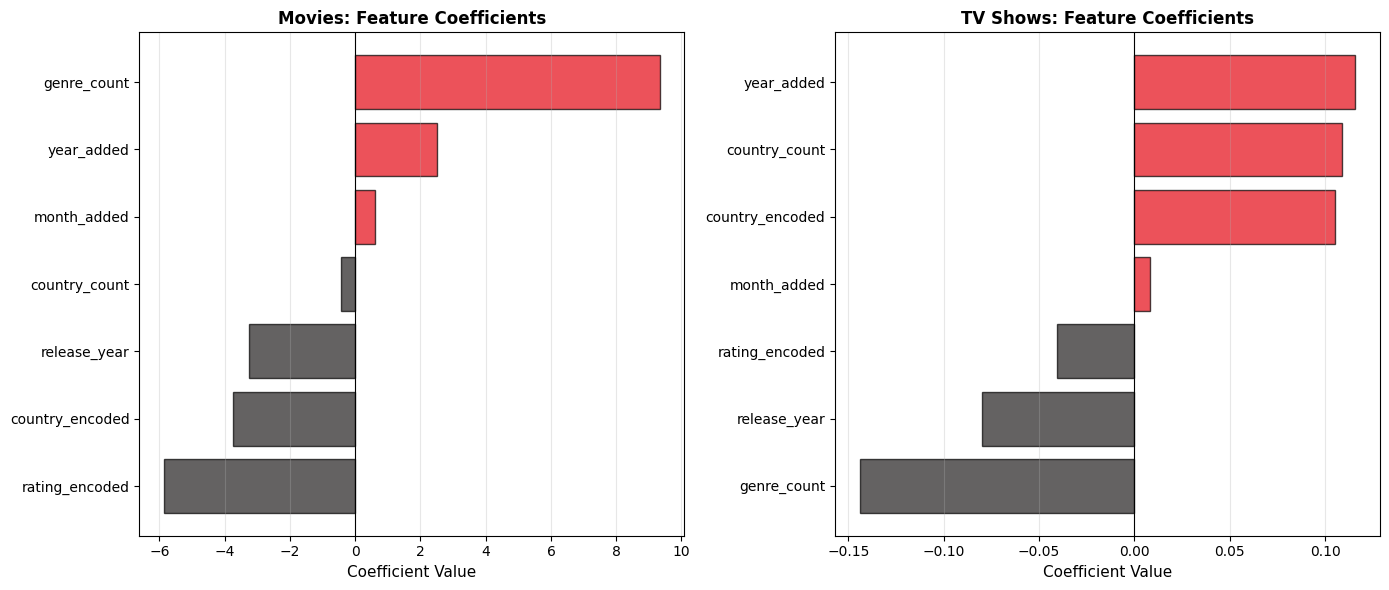

In [133]:
plt.figure(figsize=(14, 6))

# Movies - Feature Coefficients
plt.subplot(1, 2, 1)
feature_coef_sorted = feature_coef.sort_values('Coefficient', ascending=True)
colors_m = ['#E50914' if x > 0 else '#221F1F' for x in feature_coef_sorted['Coefficient']]
plt.barh(feature_coef_sorted['Feature'], feature_coef_sorted['Coefficient'], 
         color=colors_m, edgecolor='black', alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=11)
plt.title('Movies: Feature Coefficients', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# TV Shows - Feature Coefficients
plt.subplot(1, 2, 2)
feature_coef_tv_sorted = feature_coef_tv.sort_values('Coefficient', ascending=True)
colors_tv = ['#E50914' if x > 0 else '#221F1F' for x in feature_coef_tv_sorted['Coefficient']]
plt.barh(feature_coef_tv_sorted['Feature'], feature_coef_tv_sorted['Coefficient'], 
         color=colors_tv, edgecolor='black', alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=11)
plt.title('TV Shows: Feature Coefficients', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()


#### 8. Error Distribution


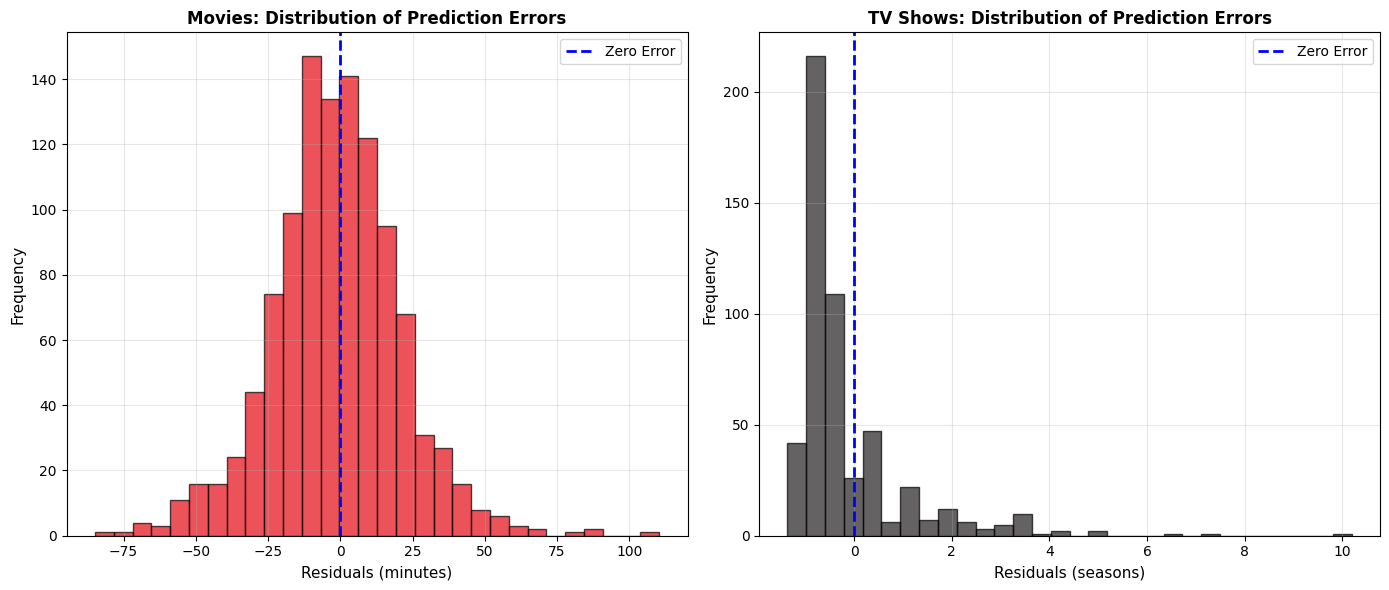

In [134]:

# %%
plt.figure(figsize=(14, 6))

# Movies - Error Distribution
plt.subplot(1, 2, 1)
plt.hist(residuals_m, bins=30, edgecolor='black', alpha=0.7, color='#E50914')
plt.xlabel('Residuals (minutes)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Movies: Distribution of Prediction Errors', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='blue', linestyle='--', lw=2, label='Zero Error')
plt.legend()
plt.grid(alpha=0.3)

# TV Shows - Error Distribution
plt.subplot(1, 2, 2)
plt.hist(residuals_tv, bins=30, edgecolor='black', alpha=0.7, color='#221F1F')
plt.xlabel('Residuals (seasons)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('TV Shows: Distribution of Prediction Errors', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='blue', linestyle='--', lw=2, label='Zero Error')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


#### 9. Model Summary

In [135]:
# Create summary table
summary_data = {
    'Content Type': ['Movies', 'TV Shows'],
    'Sample Size': [len(y_test_m), len(y_test_tv)],
    'RMSE': [f'{rmse_m:.2f} min', f'{rmse_tv:.2f} seasons'],
    'MAE': [f'{mae_m:.2f} min', f'{mae_tv:.2f} seasons'],
    'R² Score': [f'{r2_m:.4f}', f'{r2_tv:.4f}'],
    'Accuracy': [f'{r2_m*100:.2f}%', f'{r2_tv*100:.2f}%']
}

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*80)
print("LINEAR REGRESSION MODEL PERFORMANCE SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)


LINEAR REGRESSION MODEL PERFORMANCE SUMMARY
Content Type  Sample Size         RMSE          MAE R² Score Accuracy
      Movies         1097    22.35 min    16.94 min   0.2677   26.77%
    TV Shows          519 1.26 seasons 0.90 seasons  -0.0160   -1.60%
